## Chargement de données

In [64]:
import pandas as pd
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [65]:
'''Loading data'''
data = pd.read_csv("amazon.csv")

In [66]:
'''Exploring data'''

print("--------Number of columns and rows in dataset------")
num_rows, num_cols = data.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}\n")

--------Number of columns and rows in dataset------
Number of rows: 1465
Number of columns: 16



In [67]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [68]:
# Display unique values for each column
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in '{column}':\n{unique_values}\n")

Unique values in 'product_id':
['B07JW9H4J1' 'B098NS6PVG' 'B096MSW6CT' ... 'B009P2LIL4' 'B00J5DYCCA'
 'B01486F4G6']

Unique values in 'product_name':
['Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)'
 'Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)'
 'Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices'
 ...
 'Bajaj Majesty RX10 2000 Watts Heat Convector Room Heater (White, ISI Approved)'
 'Havells Ventil Air DSP 230mm Exhaust Fan (Pista Green)'
 'Borosil Jumbo 1000-Watt Grill Sandwich Maker (Black)']

Unique values in 'category':
['Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables'
 'Computers&Accessories|Networ

In [69]:
# Display rows where 'rating_count' has missing values
missing_rating_count = data[data['rating_count'].isnull()]
print("Rows with missing values in 'rating_count':")
print(missing_rating_count)

Rows with missing values in 'rating_count':
     product_id                                       product_name  \
282  B0B94JPY2N  Amazon Brand - Solimo 65W Fast Charging Braide...   
324  B0BQRJ3C47  REDTECH USB-C to Lightning Cable 3.3FT, [Apple...   

                                              category discounted_price  \
282  Computers&Accessories|Accessories&Peripherals|...             ₹199   
324  Computers&Accessories|Accessories&Peripherals|...             ₹249   

    actual_price discount_percentage rating rating_count  \
282         ₹999                 80%    3.0          NaN   
324         ₹999                 75%    5.0          NaN   

                                         about_product  \
282  USB C to C Cable: This cable has type C connec...   
324  💎[The Fastest Charge] - This iPhone USB C cabl...   

                          user_id    user_name      review_id  \
282  AE7CFHY23VAJT2FI4NZKKP6GS2UQ       Pranav   RUB7U91HVZ30   
324  AGJC5O5H5BBXWUV7WRIEIOOR3TVQ

## Prétraitement de données

In [70]:
# Supprimer le symbole '₹' et la virgule, puis convertir en float
data['actual_price'] = data['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)



In [71]:
print(data['actual_price'].unique())

[1.09900e+03 3.49000e+02 1.89900e+03 6.99000e+02 3.99000e+02 1.00000e+03
 4.99000e+02 2.99000e+02 9.99000e+02 3.39000e+02 7.99000e+02 7.00000e+02
 8.99000e+02 2.49990e+04 2.19900e+04 1.79900e+03 2.29000e+04 1.99000e+02
 1.99900e+04 1.99990e+04 1.99900e+03 7.50000e+02 5.99000e+02 6.66660e+02
 1.90000e+03 4.59990e+04 6.95000e+02 3.49990e+04 1.59900e+03 1.20800e+03
 4.75000e+02 3.95000e+02 2.19900e+03 5.00000e+02 2.10000e+03 1.29990e+04
 1.39900e+03 2.19990e+04 1.49900e+03 4.79000e+04 8.45000e+02 1.40000e+03
 1.49900e+04 2.99900e+03 4.29990e+04 3.09900e+04 3.99900e+03 2.49000e+02
 1.91250e+04 1.29900e+03 3.99990e+04 4.09900e+04 5.29000e+04 8.00000e+02
 3.19990e+04 1.80900e+03 2.99990e+04 6.50000e+04 2.00000e+04 2.39900e+04
 1.59990e+04 4.49900e+04 4.49990e+04 1.70000e+03 5.95000e+02 2.79900e+04
 1.20000e+03 3.49900e+04 1.50000e+03 4.99900e+04 9.31000e+02 2.39900e+03
 1.33900e+03 2.09000e+04 1.59900e+04 1.60000e+03 8.49000e+02 1.19900e+03
 2.29900e+04 2.49900e+03 4.79900e+04 4.85000e+02 1.

In [72]:
# Supprimer le symbole '₹' et la virgule, puis convertir en float
data['discounted_price'] = data['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)


In [73]:
print(data['discounted_price'].unique())

[3.99000e+02 1.99000e+02 3.29000e+02 1.54000e+02 1.49000e+02 1.76630e+02
 2.29000e+02 4.99000e+02 2.99000e+02 2.19000e+02 3.50000e+02 1.59000e+02
 3.49000e+02 1.39990e+04 2.49000e+02 1.34900e+04 9.70000e+02 2.79000e+02
 5.90000e+01 1.14990e+04 1.49990e+04 1.79000e+02 3.89000e+02 5.99000e+02
 9.90000e+01 8.99000e+02 3.29990e+04 2.09000e+02 1.99990e+04 9.99000e+02
 3.33000e+02 5.07000e+02 3.09000e+02 1.19900e+03 7.99000e+02 6.99900e+03
 2.30000e+02 6.49000e+02 1.59990e+04 3.48000e+02 3.29900e+04 1.39000e+02
 2.63000e+02 7.99900e+03 1.59900e+03 2.69990e+04 1.15000e+02 1.09010e+04
 1.43400e+03 7.29900e+03 3.25000e+02 2.99990e+04 2.79990e+04 3.09900e+04
 2.69000e+02 2.49990e+04 1.89900e+04 2.90000e+02 3.45000e+02 1.09900e+03
 7.19000e+02 8.49000e+02 2.19990e+04 4.49000e+02 3.79990e+04 7.39000e+03
 2.73100e+02 1.59900e+04 2.10000e+02 1.29900e+03 3.47000e+02 2.28000e+02
 1.49900e+03 8.49900e+03 2.09900e+04 9.99900e+03 4.89000e+02 2.39990e+04
 6.89000e+02 1.69900e+03 6.55000e+02 7.49000e+02 1.

In [74]:
# Supprimer le symbole de pourcentage et convertir en float
data['discount_percentage'] = data['discount_percentage'].str.rstrip('%').astype(float) / 100


In [75]:
print(data['discount_percentage'].unique())

[0.64 0.43 0.9  0.53 0.61 0.85 0.65 0.23 0.5  0.33 0.55 0.63 0.69 0.6
 0.13 0.44 0.38 0.39 0.46 0.41 0.7  0.42 0.72 0.25 0.51 0.73 0.   0.8
 0.28 0.67 0.58 0.35 0.45 0.62 0.54 0.27 0.77 0.56 0.78 0.31 0.86 0.47
 0.37 0.75 0.32 0.68 0.66 0.22 0.57 0.17 0.52 0.88 0.2  0.59 0.4  0.26
 0.29 0.83 0.71 0.15 0.76 0.48 0.82 0.36 0.89 0.87 0.24 0.34 0.11 0.91
 0.07 0.19 0.79 0.21 0.81 0.18 0.49 0.3  0.84 0.1  0.06 0.14 0.74 0.04
 0.05 0.16 0.08 0.02 0.94 0.12 0.03 0.09]


In [76]:
# Convert the 'rating' column to numeric, handling errors by setting them to NaN
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')



In [77]:
print(data['rating'].unique())

[4.2 4.  3.9 4.1 4.3 4.4 4.5 3.7 3.3 3.6 3.4 3.8 3.5 4.6 3.2 5.  4.7 3.
 2.8 3.1 4.8 2.3 nan 2.  2.6 2.9]


In [78]:
print("Number of NaN values in 'rating' column:", data['rating'].isna().sum())

Number of NaN values in 'rating' column: 1


In [79]:
mean_value = data['rating'].mean()
print(mean_value)
data['rating'] = data['rating'].fillna(mean_value)

4.096584699453552


In [80]:
print("Number of NaN values in 'rating' column:", data['rating'].isna().sum())

Number of NaN values in 'rating' column: 0


In [83]:
data_levels = data['category'].str.split('|', expand=True)

# Dynamically create column names based on the number of levels
column_names = [f'level{i+1}' for i in range(data_levels.shape[1])]

# Rename the columns
data_levels.columns = column_names

# Concatenate the original DataFrame with the new hierarchical columns
data = pd.concat([data, data_levels], axis=1)


In [84]:
data

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,level1,level2,level3,level4,level5,level6,level7
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.00,1099.00,0.64,4.200000,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.00,349.00,0.43,4.000000,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.00,1899.00,0.90,3.900000,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.00,699.00,0.53,4.200000,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.00,399.00,0.61,4.200000,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
5,B08Y1TFSP6,pTron Solero TB301 3A Type-C Data and Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,149.00,1000.00,0.85,3.900000,"24,871",Fast Charging & Data Sync: Solero TB301 Type-C...,"AEQ2YMXSZWEOHK2EHTNLOS56YTZQ,AGRVINWECNY7323CW...","Jayesh,Rajesh k.,Soopy,amazon customer,Aman,Sh...","R7S8ANNSDPR40,R3CLZFLHVJU26P,RFF7U7MPQFUGR,R1M...","It's pretty good,Average quality,very good and...","It's a good product.,Like,Very good item stron...",https://m.media-amazon.com/images/I

In [85]:
# Display unique values in each column
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'product_id': ['B07JW9H4J1' 'B098NS6PVG' 'B096MSW6CT' ... 'B009P2LIL4' 'B00J5DYCCA'
 'B01486F4G6']
Unique values in 'product_name': ['Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)'
 'Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)'
 'Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices'
 ...
 'Bajaj Majesty RX10 2000 Watts Heat Convector Room Heater (White, ISI Approved)'
 'Havells Ventil Air DSP 230mm Exhaust Fan (Pista Green)'
 'Borosil Jumbo 1000-Watt Grill Sandwich Maker (Black)']
Unique values in 'category': ['Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables'
 'Computers&Accessories|Networki

In [86]:
summary_stats = data.describe()
summary_stats

,discounted_price,actual_price,discount_percentage,rating
count,1465.000000,1465.000000,1465.000000,1465.000000
mean,3125.310874,5444.990635,0.476915,4.096585
std,6944.304394,10874.826864,0.216359,0.291574
min,39.000000,39.000000,0.000000,2.000000
25%,325.000000,800.000000,0.320000,4.000000
50%,799.000000,1650.000000,0.500000,4.100000
75%,1999.000000,4295.000000,0.630000,4.300000
max,77990.000000,139900.000000,0.940000,5.000000


## Descriptive Statistics

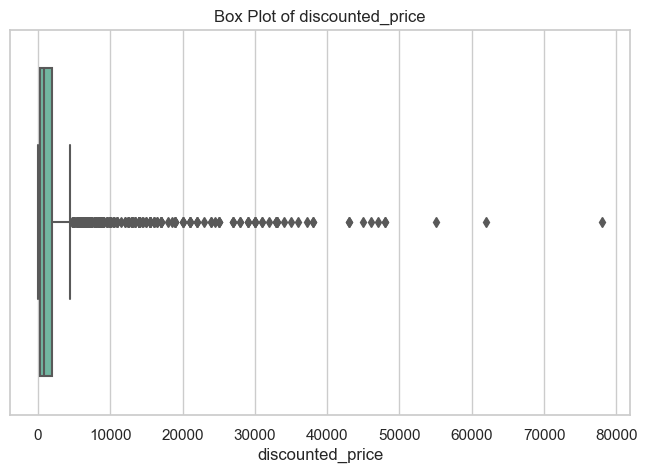

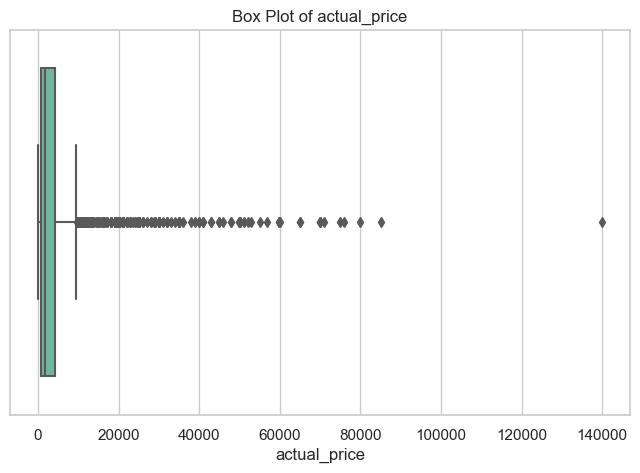

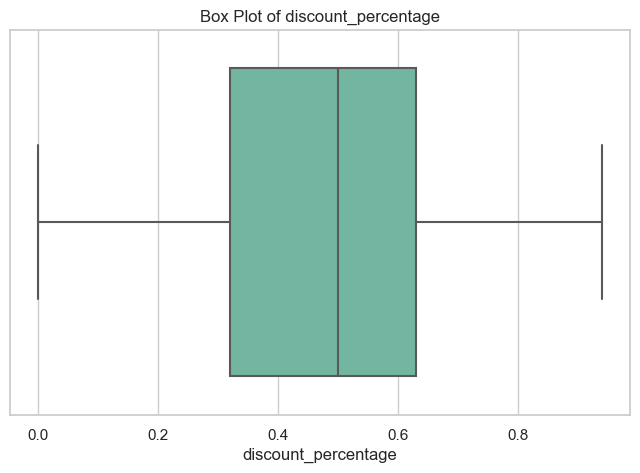

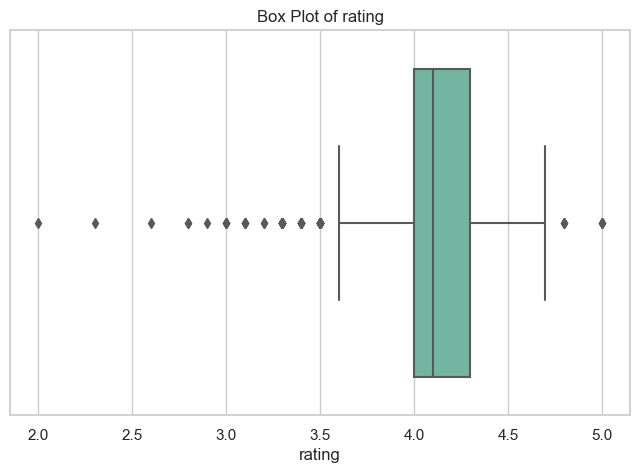

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Selecting relevant columns
numerical_columns = ['discounted_price', 'actual_price', 'discount_percentage', 'rating']

# Creating individual box plots for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=data[column], palette="Set2")
    plt.title(f'Box Plot of {column}')
    plt.show()

In [91]:
correlation_matrix = data[['discounted_price', 'rating']].corr()
correlation_matrix 

,discounted_price,rating
discounted_price,1.000000,0.120337
rating,0.120337,1.000000


In [92]:
correlation_matrix = data[['actual_price', 'rating']].corr()
correlation_matrix 

,actual_price,rating
actual_price,1.000000,0.121639
rating,0.121639,1.000000
